# Customer Segmentation 

## Step: 1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Step:2 Data Cleaning

In [5]:
df= pd.read_excel("C:\Online Retail.xlsx")

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Step:3 Handle Missing Values

In [14]:
# Drop rows with missing CustomerID
df_cleaned = df.dropna(subset=['CustomerID'])
# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [15]:
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Step:4 Feature Engineering

In [18]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [19]:
df_cleaned['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 401604, dtype: float64

## Step:5 Exploratory Data Analysis(EDA)

## 1.Total Sales by Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Belgium'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Portugal'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Channel Islands'),
  Text(15, 0, 'Denmark'),
  Text(16, 0, 'Italy'),
  Text(17, 0, 'Cyprus'),
  Text(18, 0, 'Singapore'),
  Text(19, 0, 'Austria'),
  Text(20, 0, 'Hong Kong'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Poland'),
  Text(23, 0, 'Unspecified'),
  Text(24, 0, 'Canada'),
  Text(25, 0, 'Iceland'),
  Text(26, 0, 'Greece'),
  Text(27, 0, 'USA'),
  Text(28, 0, 'United Arab Emirates'),
  Text(29, 0, 'Malta'),
  Text(30, 0, 'Lithuania'),


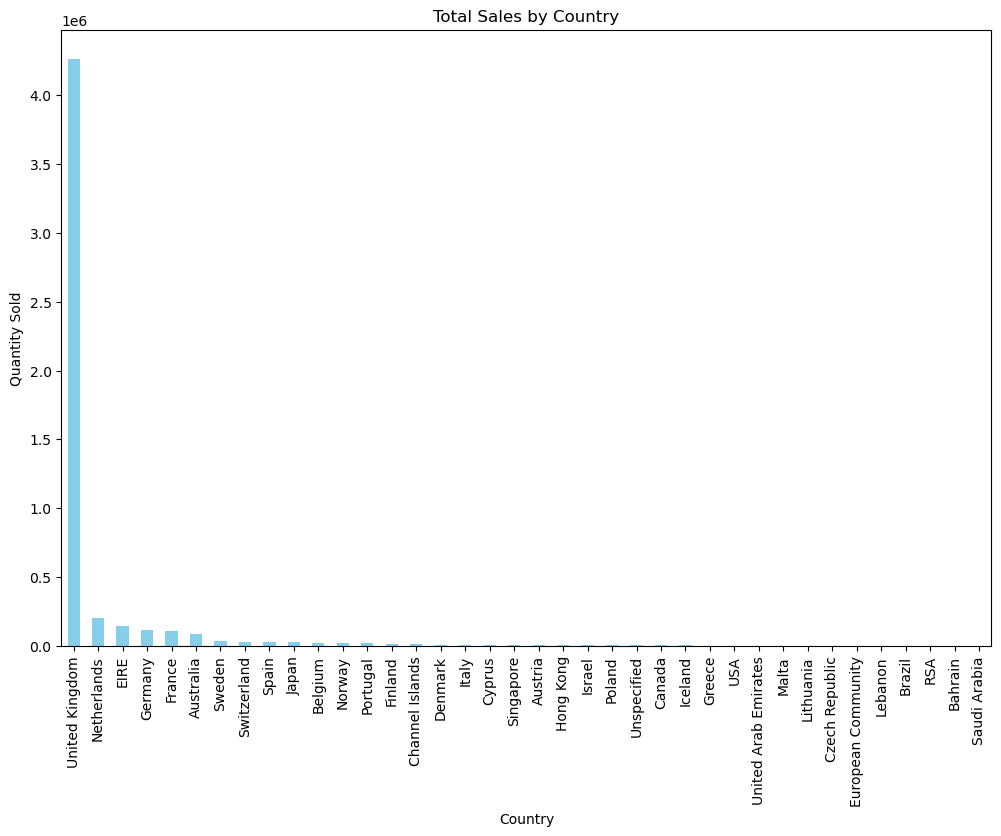

In [22]:
# Total Sales by Country
country_sales = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
country_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.ylabel('Quantity Sold')
plt.xlabel('Country')
plt.xticks(rotation=90)

## 2. Sales Over Time

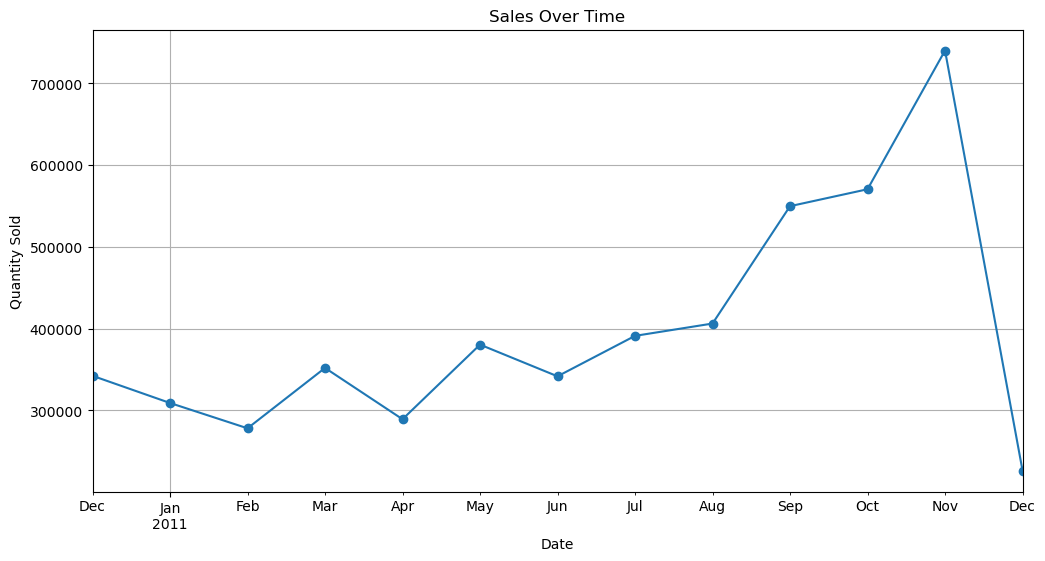

In [24]:
# Sales Over Time
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df['Quantity'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Sales Over Time')
plt.ylabel('Quantity Sold')
plt.xlabel('Date')
plt.grid(True)
plt.show()

## 3.Most Popular Products

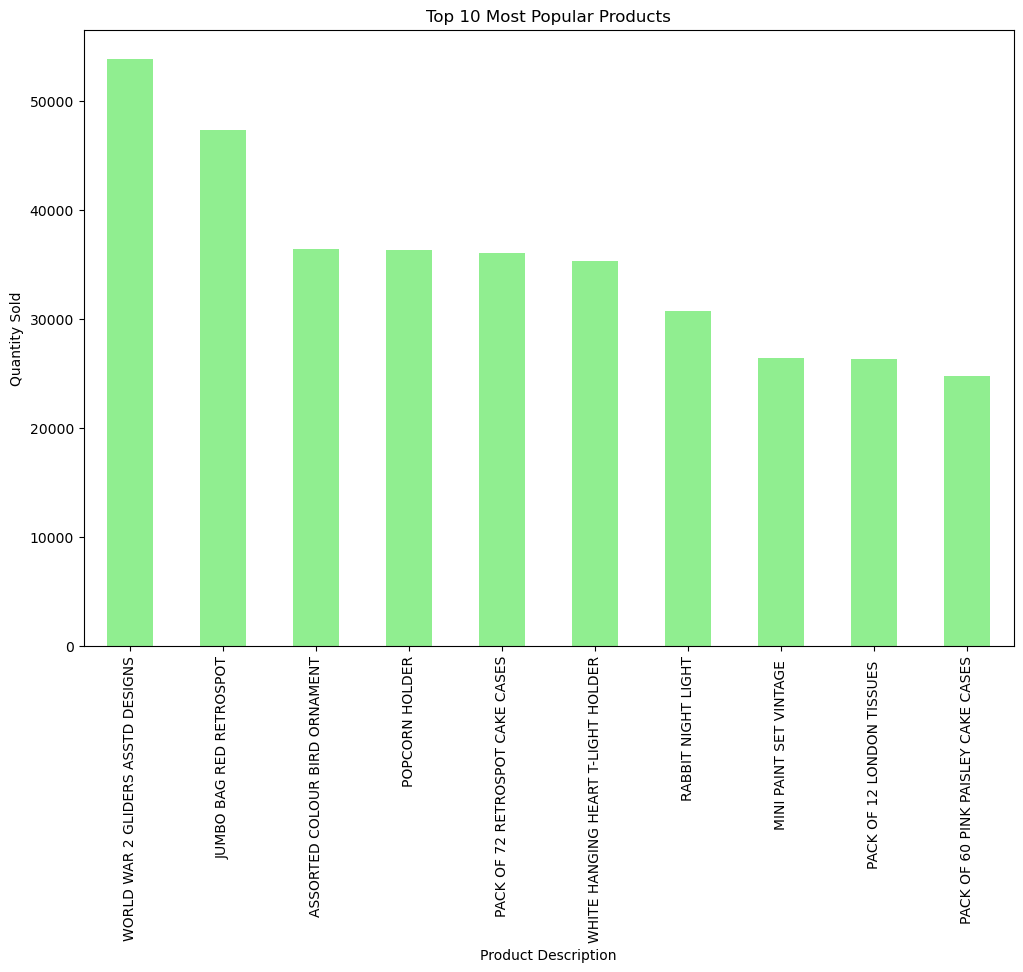

In [26]:
# Most Popular Products
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
product_sales.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Popular Products')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=90)
plt.show()

## 4. Revenue By Country

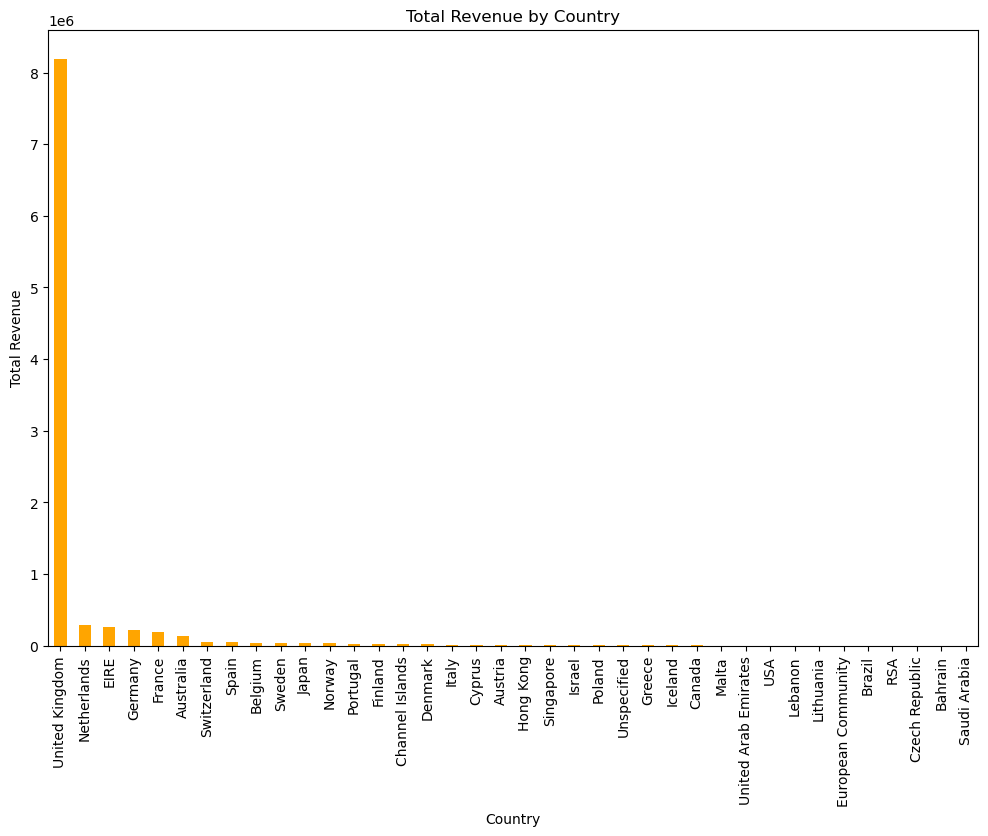

In [28]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
country_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Country')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

## 5. Revenue Over Time

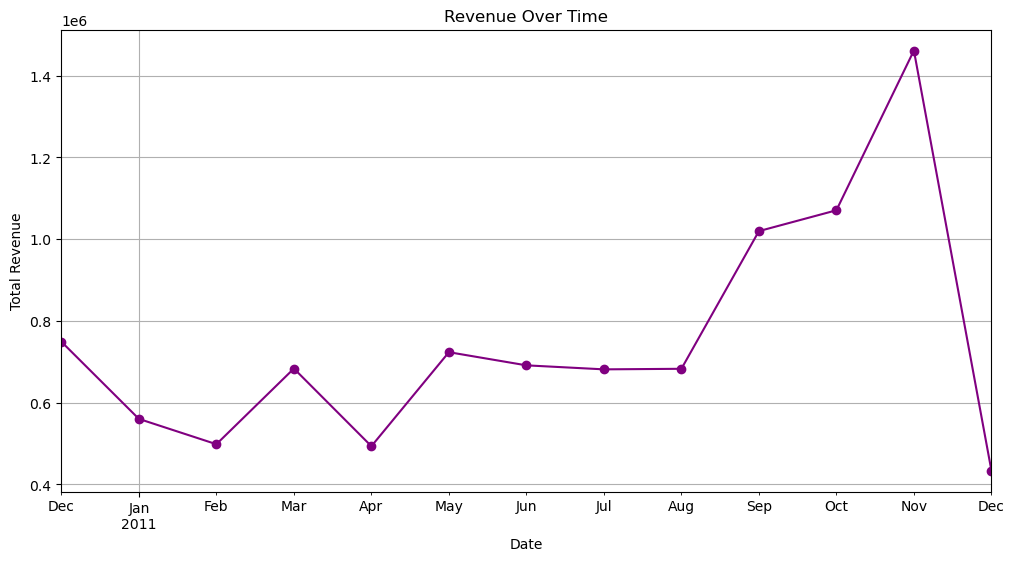

In [30]:
monthly_revenue = df['Revenue'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Revenue Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Date')
plt.grid(True)
plt.show()

## 6. Top Customers By Revenue

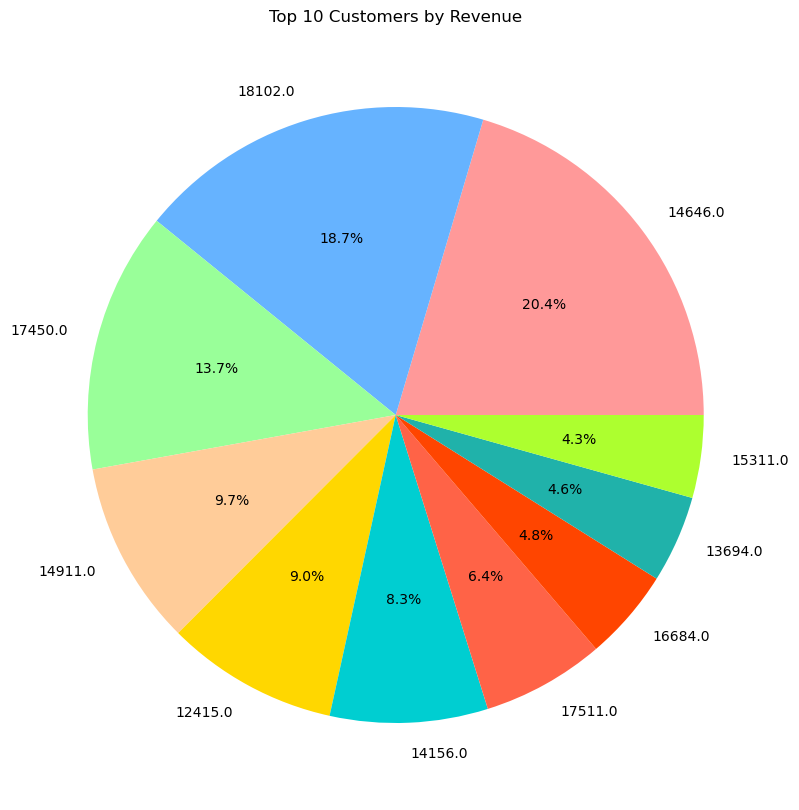

In [32]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 10))
top_customers.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700','#00CED1','#FF6347','#FF4500','#20B2AA','#ADFF2F'])
plt.title('Top 10 Customers by Revenue')
plt.ylabel('')  # Hide the y-label for better appearance
plt.show()

## 7. Purchase Frequency Distribution

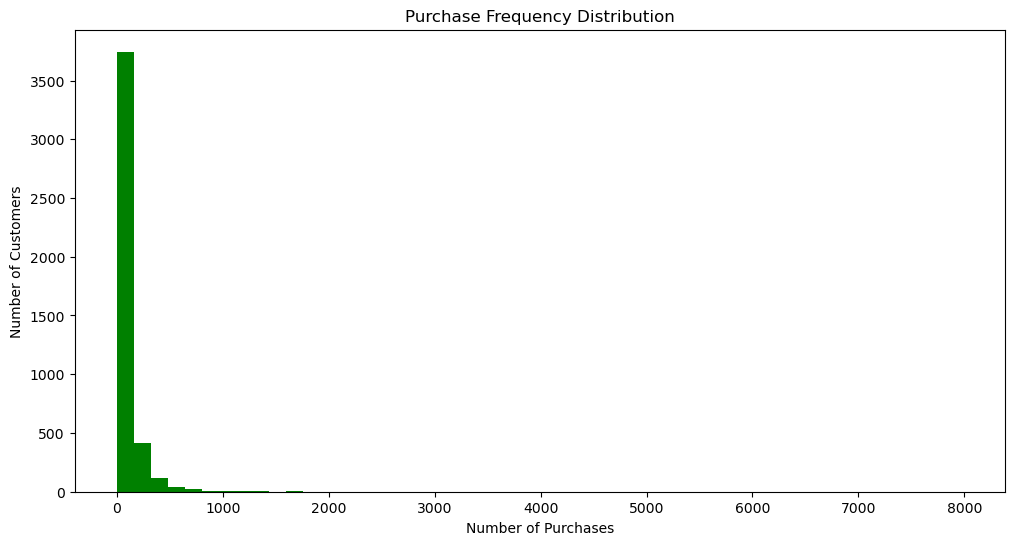

In [34]:
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].count()
plt.figure(figsize=(12, 6))
purchase_frequency.plot(kind='hist', bins=50, color='green')
plt.title('Purchase Frequency Distribution')
plt.ylabel('Number of Customers')
plt.xlabel('Number of Purchases')
plt.show()

## 8. Average Order Value (AOV)

In [36]:
df['OrderValue'] = df['Revenue']
aov = df.groupby('InvoiceNo')['OrderValue'].sum().mean()
print(f'The Average Order Value is: {aov:.2f}')

The Average Order Value is: 376.36


## 9. Customer Lifetime Value (CLV)

In [38]:
# Calculate Customer Lifetime Value (CLV)
clv = df.groupby('CustomerID')['Revenue'].sum()

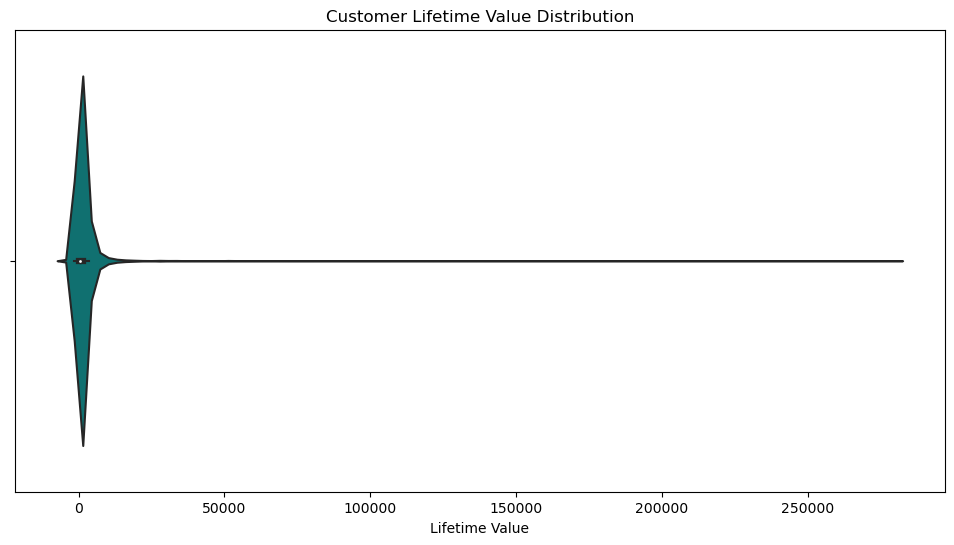

In [39]:
# Violin Plot for CLV
plt.figure(figsize=(12, 6))
sns.violinplot(x=clv, color='teal')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Lifetime Value')
plt.show()

# Step:6 RFM Feature Engineering

In [41]:
import datetime as dt
# Ensure InvoiceDate is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

In [42]:
# Drop rows with missing InvoiceDate
df_cleaned = df_cleaned.dropna(subset=['InvoiceDate'])

In [43]:
# Define the latest date in the dataset
latest_date = df_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

In [44]:
# Calculate Recency
df_cleaned['Recency'] = (latest_date - df_cleaned['InvoiceDate']).dt.days

In [45]:
# Calculate Frequency
frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

In [46]:
# Calculate Monetary
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
monetary = df_cleaned.groupby('CustomerID')['Revenue'].sum()

In [47]:
# Combine into a single DataFrame
recency = df_cleaned.groupby('CustomerID')['Recency'].min()
rfm = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

In [48]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [49]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


# Step7: Customer Segmentation Using K-Means

## 1.Standardize the Data:

In [52]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

## 2.Determine Optimal Number of Clusters (Elbow Method):

In [54]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

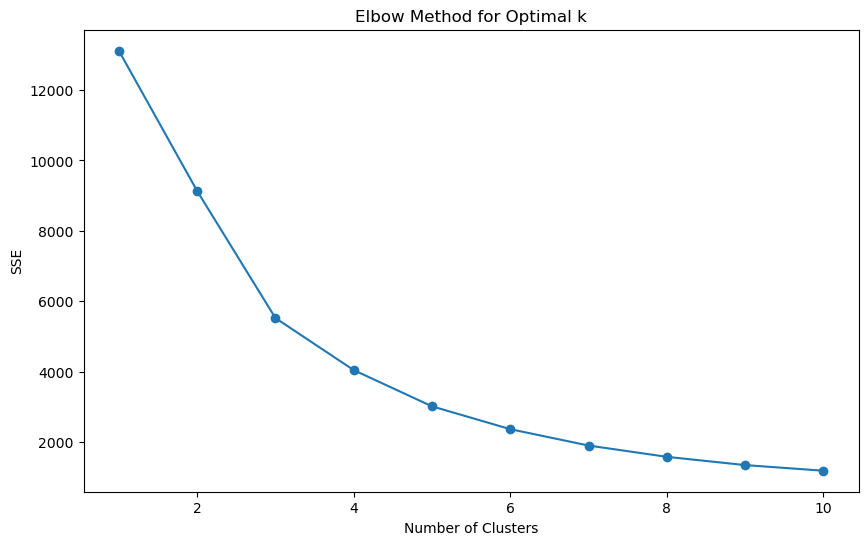

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

## 3. Apply K-Means Clustering:

In [57]:
# Assuming the optimal number of clusters is 4 based on the elbow plot
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(rfm.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          2      0.00        1
12347.0           2          7   4310.00        0
12348.0          75          4   1797.24        0
12349.0          19          1   1757.55        0
12350.0         310          1    334.40        1


## 4. Analyze the Clusters:

In [59]:
# Profiling the clusters
cluster_profile = rfm.groupby('Cluster').mean()
print(cluster_profile)

            Recency  Frequency       Monetary
Cluster                                      
0         41.606500   4.802461    1472.653251
1        247.951242   1.805888     451.802991
2          7.666667  89.000000  182108.075000
3          9.181818  40.672727   18435.663364


## 5.Visualize the Clusters:

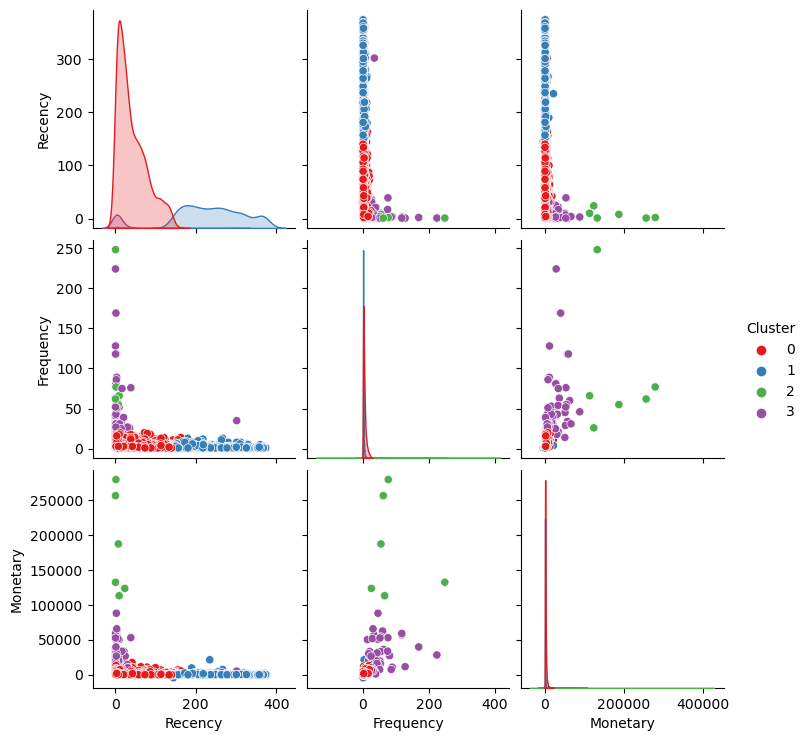

In [61]:
sns.pairplot(rfm, hue='Cluster', palette='Set1')
plt.show()

# Visualization of Clusters

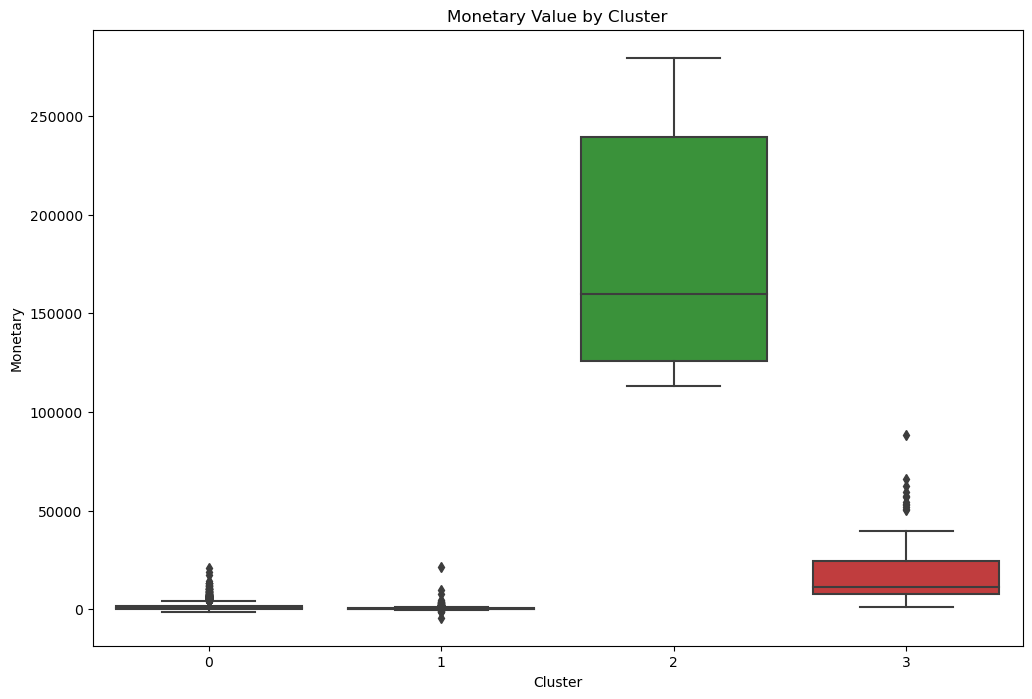

In [63]:
# Boxplot for detailed comparison
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Monetary', data=rfm)
plt.title('Monetary Value by Cluster')
plt.show()

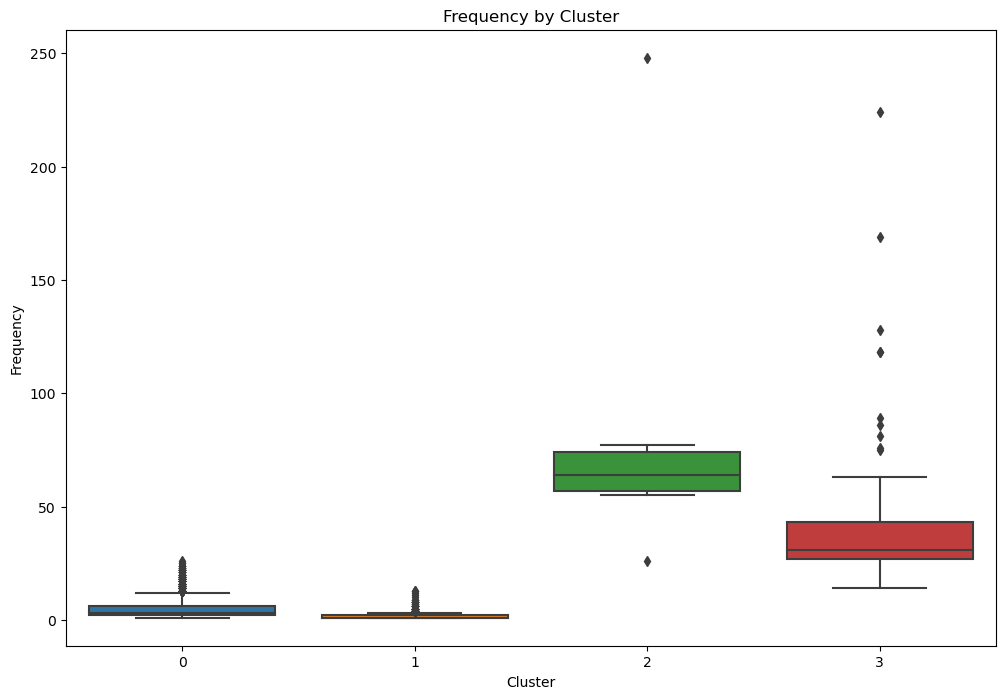

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Frequency by Cluster')
plt.show()

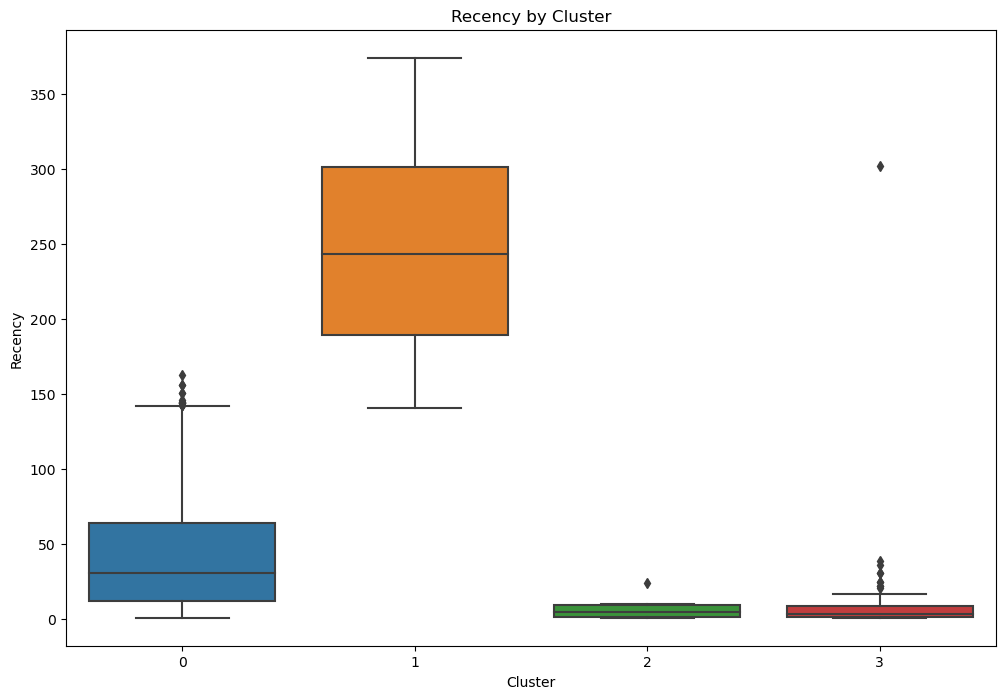

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Recency by Cluster')
plt.show()

In [109]:
df_cleaned.to_csv('cleaned_online_retail.csv', index=False)

In [111]:
import os
print(os.getcwd())

C:\Users\mounika
